In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [28]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [29]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [30]:
df.shape

(10000, 6)

In [31]:
df.size

60000

In [32]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [33]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [34]:
m=df['Extracurricular Activities'].value_counts()
m

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

Text(0, 0.5, 'Count')

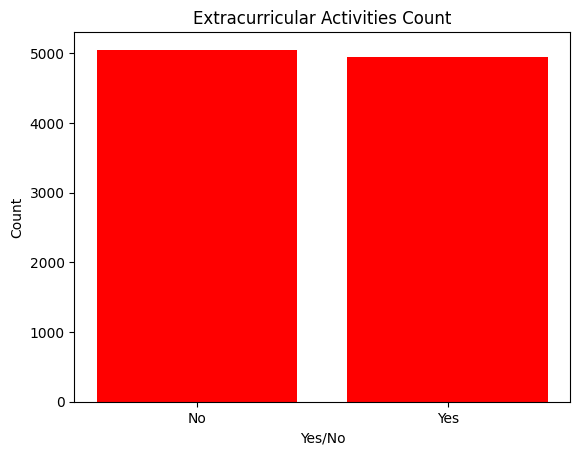

In [35]:
plt.bar(m.index,m.values,color='r')
plt.title('Extracurricular Activities Count')
plt.xlabel('Yes/No')
plt.ylabel('Count')

In [36]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [37]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [38]:
cor=df.corr(numeric_only=True)
cor

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [39]:
df.drop(['Sample Question Papers Practiced'],axis=1,inplace=True)

<Axes: >

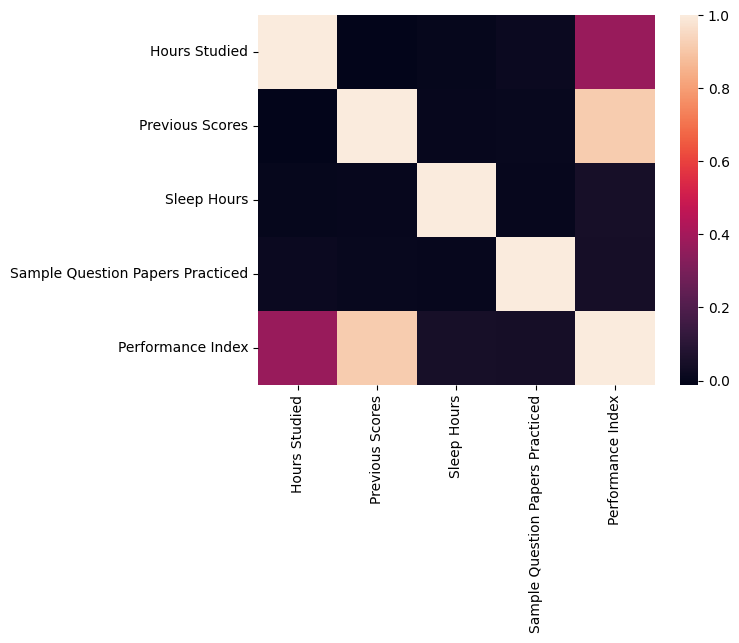

In [40]:
sns.heatmap(cor)

In [41]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Performance Index'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Extracurricular Activities']=label.fit_transform(df['Extracurricular Activities'])

In [43]:
df.dtypes

Hours Studied                   int64
Previous Scores                 int64
Extracurricular Activities      int64
Sleep Hours                     int64
Performance Index             float64
dtype: object

In [44]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [45]:
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours
0,7,99,1,9
1,4,82,0,4
2,8,51,1,7
3,5,52,1,5
4,7,75,0,8


In [46]:
x.ndim

2

In [47]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

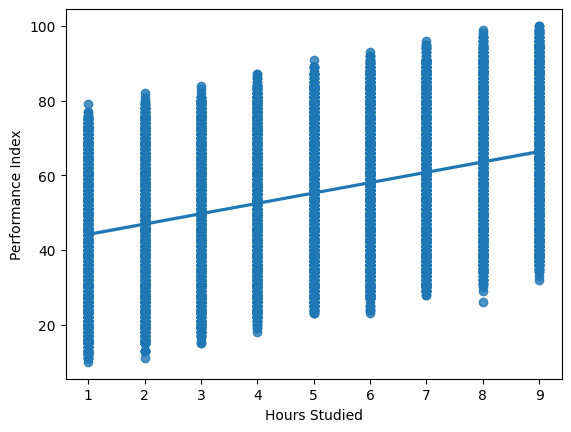

In [48]:
sns.regplot(x=df['Hours Studied'],y=y)

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

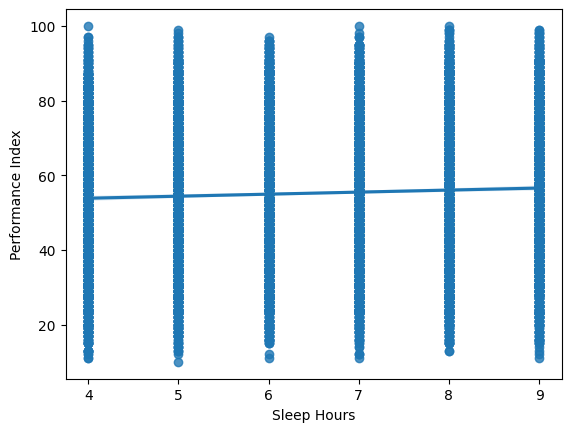

In [50]:
sns.regplot(x=df['Sleep Hours'],y=y)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

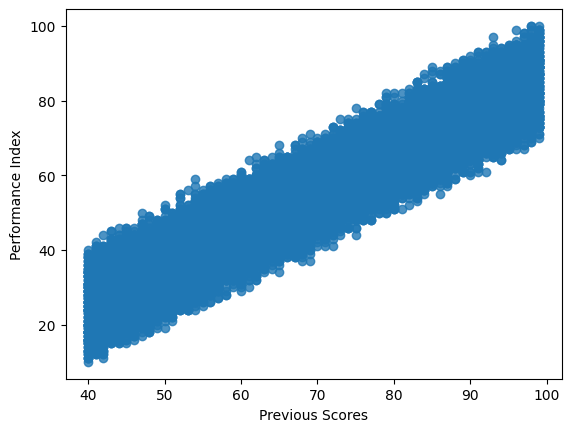

In [25]:
sns.regplot(x=df['Previous Scores'],y=y)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [52]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([61.66364023, 64.26503474, 78.60143345, ..., 85.70413045,
       63.58198811, 44.38617242], shape=(3000,))

In [53]:
#DF
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_pred-y_test})
df1

,Actual_value,Predicted_value,Difference
9953,58.0,61.663640,3.663640
3850,64.0,64.265035,0.265035
4962,75.0,78.601433,3.601433
3886,59.0,63.385041,4.385041
5437,86.0,86.513569,0.513569
...,...,...,...
5273,51.0,45.755977,-5.244023
8014,32.0,31.650311,-0.349689
8984,87.0,85.704130,-1.295870
6498,68.0,63.581988,-4.418012


In [54]:
print(model.coef_)

[2.85958239 1.018208   0.60797848 0.47156992]


In [55]:
print(model.intercept_)

-33.12402757670333


In [56]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

In [57]:
print('MAE ',mean_absolute_error(y_test,y_pred))
print('MAPE ',mean_absolute_percentage_error(y_test,y_pred))
print('MSE ',mean_squared_error(y_test,y_pred))
print('RMSE ',root_mean_squared_error(y_test,y_pred))
print('R2 ',r2_score(y_test,y_pred))

MAE  1.680079356937698
MAPE  0.03556651946216714
MSE  4.543821021667856
RMSE  2.1316240338455223
R2  0.9875010730395049
